In [ ]:
!unzip /content/dataset/dataset_penggunaan_helm.zip


Archive:  /content/dataset/dataset_penggunaan_helm.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/20220626172330_imm_5005_1_jpg.rf.47ef1c6d0fab94107c653adbb6ec74ea.jpg  
 extracting: test/images/2023-11-tips-sukses-di-usia-muda_webp.rf.65a9bfdca4acf865ed9367fe331c05b9.jpg  
 extracting: test/images/21357940_jpg.rf.ab65778f0d4edd625da6ca2fe57d162c.jpg  
 extracting: test/images/2C90E806-8052-4525-B0BC-67A3C51798BD_JPEG.rf.1cbcca15a18fb8f5cea5c6e9135c7fa3.jpg  
 extracting: test/images/63b_jpg.rf.715f5251ee9757091700daf13c9cc533.jpg  
 extracting: test/images/99841576-people-riding-motorcycles-on-the-road-at-hanoi-vietnam-_jpg.rf.428bca4901507aa18e8e5377b165c66c.jpg  
 extracting: test/images/BikesHelmets194_png.rf.79f21d5a135990f9bded6cbd7c4a1124.jpg  
 extracting: test/images/BikesHelmets502_png.rf.aae40d91f45ba01a6d47e0dc4e6dc33c.jpg  
 extractin

In [ ]:
!cat dataset/data.yaml


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 3
names: ['Ga pake Helm', 'Helm', 'orang']

roboflow:
  workspace: tugas-oqy6d
  project: lalu_lintas_helm
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/tugas-oqy6d/lalu_lintas_helm/dataset/6

In [ ]:
%%writefile dataset/data.yaml
train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 3
names: ['Ga pake Helm','Helm', 'orang']

roboflow:
  workspace: tugas-oqy6d
  project: lalu_lintas_helm
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/tugas-oqy6d/lalu_lintas_helm/dataset/6


Overwriting dataset/data.yaml


In [ ]:
!cat dataset/data.yaml

train: /content/dataset/train/images
val: /content/dataset/valid/images
test: /content/dataset/test/images

nc: 3
names: ['Ga pake Helm','Helm', 'orang']

roboflow:
  workspace: tugas-oqy6d
  project: lalu_lintas_helm
  version: 6
  license: CC BY 4.0
  url: https://universe.roboflow.com/tugas-oqy6d/lalu_lintas_helm/dataset/6


Install


In [ ]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.1 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import torch

# =========================
# CEK GPU
# =========================
print("CUDA available:", torch.cuda.is_available())
print("Device:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

# =========================
# LOAD MODEL PRETRAINED
# =========================
model = YOLO("yolo11n.pt")

# =========================
# TRAINING + AUGMENTASI
# =========================
model.train(
    data="/content/dataset/data.yaml",
    epochs=90,
    imgsz=640,
    batch=16,
    device=0,

    # =========================
    # AUGMENTATION
    # =========================
    hsv_h=0.015,      # variasi warna (hue)
    hsv_s=0.7,        # saturasi
    hsv_v=0.4,        # brightness

    degrees=10.0,     # rotasi ±10 derajat
    translate=0.1,    # geser posisi
    scale=0.5,        # zoom in/out
    shear=2.0,        # distorsi perspektif

    flipud=0.0,       # flip vertikal (tidak disarankan)
    fliplr=0.5,       # flip horizontal

    mosaic=1.0,       # gabung 4 gambar
    mixup=0.2         # campur 2 gambar
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
CUDA available: True
Device: Tesla T4
Ultralytics 8.3.241 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/data.yaml, degrees=10.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=90, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7caafdcc4fb0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

**INPUT**

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

model = YOLO("runs/detect/train/weights/best.pt")


Saving 1.png to 1.png

image 1/1 /content/1.png: 640x544 2 Helms, 1 orang, 53.1ms
Speed: 3.1ms preprocess, 53.1ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 544)


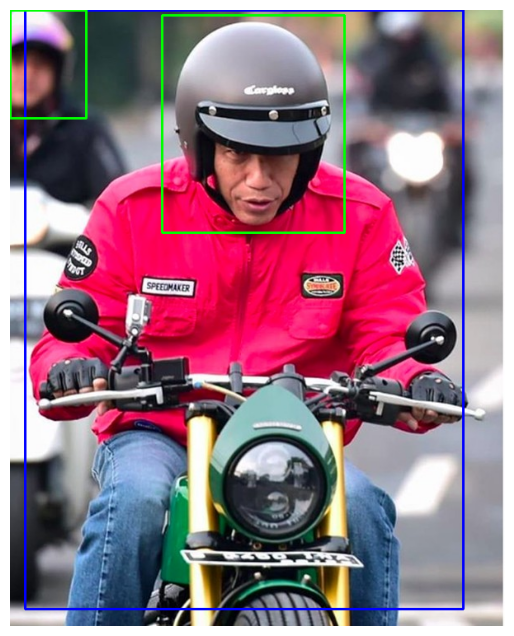

📌 KESIMPULAN:
✅ Pengendara TERDETEKSI MEMAKAI HELM


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

results = model(image_path)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# =========================
# FLAG DETEKSI SESUAI DATASET
# =========================
ada_orang = False
ada_helm = False
ada_tanpa_helm = False

# =========================
# DRAW BOUNDING BOX
# =========================
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.names[cls_id]  # JANGAN lower(), karena ada spasi

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Warna sesuai kelas
        if label == "Helm":
            color = (0, 255, 0)
            ada_helm = True
        elif label == "Ga pake Helm":
            color = (255, 0, 0)
            ada_tanpa_helm = True
        elif label == "orang":
            color = (0, 0, 255)
            ada_orang = True
        else:
            color = (255, 255, 0)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
            img,
            f"{label} ({conf:.2f})",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            color,
            2
        )

# =========================
# LOGIKA KESIMPULAN (UPDATED)
# =========================
if ada_orang and ada_helm:
    kesimpulan = "✅ Pengendara TERDETEKSI MEMAKAI HELM"

elif ada_orang and ada_tanpa_helm:
    kesimpulan = "❌ Pengendara TERDETEKSI TIDAK MEMAKAI HELM"

elif ada_orang:
    kesimpulan = "⚠️ Pengendara terdeteksi, namun status helm tidak jelas"

else:
    kesimpulan = "⚠️ Tidak terdeteksi pengendara pada gambar"

# =========================
# TAMPILKAN GAMBAR
# =========================
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()

print("📌 KESIMPULAN:")
print(kesimpulan)


Saving 3.jpg to 3.jpg

image 1/1 /content/3.jpg: 448x640 1 Ga pake Helm, 4 Helms, 4 orangs, 55.1ms
Speed: 2.6ms preprocess, 55.1ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


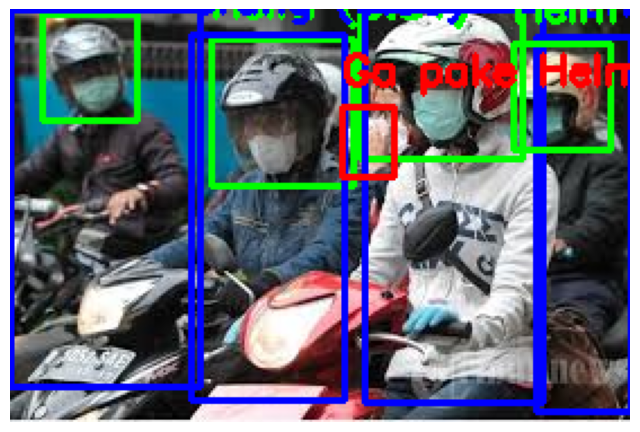

📌 KESIMPULAN:
✅ Pengendara TERDETEKSI MEMAKAI HELM


In [ ]:
from google.colab import files
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()
image_path = list(uploaded.keys())[0]

results = model(image_path)

img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# =========================
# FLAG DETEKSI SESUAI DATASET
# =========================
ada_orang = False
ada_helm = False
ada_tanpa_helm = False

# =========================
# DRAW BOUNDING BOX
# =========================
for r in results:
    for box in r.boxes:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        label = model.names[cls_id]  # JANGAN lower(), karena ada spasi

        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Warna sesuai kelas
        if label == "Helm":
            color = (0, 255, 0)
            ada_helm = True
        elif label == "Ga pake Helm":
            color = (255, 0, 0)
            ada_tanpa_helm = True
        elif label == "orang":
            color = (0, 0, 255)
            ada_orang = True
        else:
            color = (255, 255, 0)

        cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
        cv2.putText(
            img,
            f"{label} ({conf:.2f})",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            color,
            2
        )

# =========================
# LOGIKA KESIMPULAN (UPDATED)
# =========================
if ada_orang and ada_helm:
    kesimpulan = "✅ Pengendara TERDETEKSI MEMAKAI HELM"

elif ada_orang and ada_tanpa_helm:
    kesimpulan = "❌ Pengendara TERDETEKSI TIDAK MEMAKAI HELM"

elif ada_orang:
    kesimpulan = "⚠️ Pengendara terdeteksi, namun status helm tidak jelas"

else:
    kesimpulan = "⚠️ Tidak terdeteksi pengendara pada gambar"

# =========================
# TAMPILKAN GAMBAR
# =========================
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis("off")
plt.show()

print("📌 KESIMPULAN:")
print(kesimpulan)


TES 2


In [ ]:
from google.colab import files
import cv2

uploaded = files.upload()
video_path = list(uploaded.keys())[0]

cap = cv2.VideoCapture(video_path)

# Setup writer (simpan hasil)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    'hasil_deteksi_helm.mp4',
    fourcc,
    cap.get(cv2.CAP_PROP_FPS),
    (int(cap.get(3)), int(cap.get(4)))
)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    ada_orang = False
    ada_helm = False
    ada_tanpa_helm = False

    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls_id]  # jangan lower (ada spasi)

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if label == "Helm":
                color = (0, 255, 0)
                ada_helm = True
            elif label == "Ga pake Helm":
                color = (0, 0, 255)
                ada_tanpa_helm = True
            elif label == "orang":
                color = (255, 0, 0)
                ada_orang = True
            else:
                color = (255, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                frame,
                f"{label} ({conf:.2f})",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # Kesimpulan per frame
    if ada_orang and ada_helm:
        status = "MEMAKAI HELM"
        warna = (0, 255, 0)
    elif ada_orang and ada_tanpa_helm:
        status = "TIDAK MEMAKAI HELM"
        warna = (0, 0, 255)
    elif ada_orang:
        status = "STATUS HELM TIDAK JELAS"
        warna = (0, 255, 255)
    else:
        status = "TIDAK ADA PENGENDARA"
        warna = (255, 255, 0)

    cv2.putText(frame, status, (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, warna, 3)

    out.write(frame)

cap.release()
out.release()

print("✅ Video hasil deteksi tersimpan sebagai: hasil_deteksi_helm.mp4")


Saving Suasana Lalu Lintas Arah Salemba #police #shorts #viral #suasana #video.mp4 to Suasana Lalu Lintas Arah Salemba #police #shorts #viral #suasana #video.mp4

0: 640x384 2 Helms, 3 orangs, 67.2ms
Speed: 3.5ms preprocess, 67.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 Helms, 2 orangs, 9.1ms
Speed: 3.2ms preprocess, 9.1ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 Helm, 1 orang, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 8.1ms
Speed: 2.4ms preprocess, 8.1ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 orang, 8.2ms
Speed: 2.5ms preprocess, 8.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 orang, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 2 orangs, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inf

In [ ]:
from google.colab import files
import cv2

uploaded = files.upload()
video_path = list(uploaded.keys())[0]

cap = cv2.VideoCapture(video_path)

# Setup writer (simpan hasil)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(
    'hasil_deteksi_helm2.mp4',
    fourcc,
    cap.get(cv2.CAP_PROP_FPS),
    (int(cap.get(3)), int(cap.get(4)))
)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    ada_orang = False
    ada_helm = False
    ada_tanpa_helm = False

    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls_id]  # jangan lower (ada spasi)

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if label == "Helm":
                color = (0, 255, 0)
                ada_helm = True
            elif label == "Ga pake Helm":
                color = (0, 0, 255)
                ada_tanpa_helm = True
            elif label == "orang":
                color = (255, 0, 0)
                ada_orang = True
            else:
                color = (255, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                frame,
                f"{label} ({conf:.2f})",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # Kesimpulan per frame
    if ada_orang and ada_helm:
        status = "MEMAKAI HELM"
        warna = (0, 255, 0)
    elif ada_orang and ada_tanpa_helm:
        status = "TIDAK MEMAKAI HELM"
        warna = (0, 0, 255)
    elif ada_orang:
        status = "STATUS HELM TIDAK JELAS"
        warna = (0, 255, 255)
    else:
        status = "TIDAK ADA PENGENDARA"
        warna = (255, 255, 0)

    cv2.putText(frame, status, (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, warna, 3)

    out.write(frame)

cap.release()
out.release()

print("✅ Video hasil deteksi tersimpan sebagai: hasil_deteksi_helm2.mp4")


Streaming output truncated to the last 5000 lines.

0: 480x640 2 Helms, 8.6ms
Speed: 1.7ms preprocess, 8.6ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Helms, 8.4ms
Speed: 2.5ms preprocess, 8.4ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Helms, 11.1ms
Speed: 1.8ms preprocess, 11.1ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Helms, 8.7ms
Speed: 1.7ms preprocess, 8.7ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Helms, 9.3ms
Speed: 1.6ms preprocess, 9.3ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Helm, 8.2ms
Speed: 2.4ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 Helms, 8.4ms
Speed: 1.8ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 1 Helm, 8.4ms
Speed: 2.0ms preprocess, 8.4ms inference, 1.3ms postprocess p

Webcam

In [ ]:
import cv2
from ultralytics import YOLO

model = YOLO("runs/detect/train/weights/best.pt")

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)

    ada_orang = False
    ada_helm = False
    ada_tanpa_helm = False

    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls_id]

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if label == "Helm":
                color = (0, 255, 0)
                ada_helm = True
            elif label == "Ga pake Helm":
                color = (0, 0, 255)
                ada_tanpa_helm = True
            elif label == "orang":
                color = (255, 0, 0)
                ada_orang = True
            else:
                color = (255, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                frame,
                f"{label} ({conf:.2f})",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # Kesimpulan realtime
    if ada_orang and ada_helm:
        status = "MEMAKAI HELM"
        warna = (0, 255, 0)
    elif ada_orang and ada_tanpa_helm:
        status = "TIDAK MEMAKAI HELM"
        warna = (0, 0, 255)
    elif ada_orang:
        status = "STATUS HELM TIDAK JELAS"
        warna = (0, 255, 255)
    else:
        status = "TIDAK ADA PENGENDARA"
        warna = (255, 255, 0)

    cv2.putText(frame, status, (20, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, warna, 3)

    cv2.imshow("Realtime Deteksi Helm", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Dari VS Code

In [ ]:
import cv2
from ultralytics import YOLO

# =========================
# LOAD MODEL
# =========================
model = YOLO("/content/runs/detect/train/weights/best.pt")  # pastikan best.pt satu folder

# =========================
# AKSES WEBCAM
# =========================
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("❌ Webcam tidak bisa dibuka")
    exit()

print("✅ Webcam aktif, tekan 'q' untuk keluar")

# =========================
# LOOP REALTIME
# =========================
while True:
    ret, frame = cap.read()
    if not ret:
        print("❌ Gagal membaca frame")
        break

    results = model(frame, conf=0.5)

    ada_orang = False
    ada_helm = False
    ada_tanpa_helm = False

    for r in results:
        for box in r.boxes:
            cls_id = int(box.cls[0])
            conf = float(box.conf[0])
            label = model.names[cls_id]

            x1, y1, x2, y2 = map(int, box.xyxy[0])

            if label == "Helm":
                color = (0, 255, 0)
                ada_helm = True
            elif label == "Ga pake Helm":
                color = (0, 0, 255)
                ada_tanpa_helm = True
            elif label == "orang":
                color = (255, 0, 0)
                ada_orang = True
            else:
                color = (255, 255, 0)

            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(
                frame,
                f"{label} ({conf:.2f})",
                (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                color,
                2
            )

    # =========================
    # STATUS HELM
    # =========================
    if ada_orang and ada_helm:
        status = "MEMAKAI HELM"
        warna_status = (0, 255, 0)
    elif ada_orang and ada_tanpa_helm:
        status = "TIDAK MEMAKAI HELM"
        warna_status = (0, 0, 255)
    elif ada_orang:
        status = "STATUS HELM TIDAK JELAS"
        warna_status = (0, 255, 255)
    else:
        status = "TIDAK Orang TERDETEKSI"
        warna_status = (255, 255, 0)

    cv2.putText(
        frame,
        status,
        (20, 40),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        warna_status,
        3
    )

    cv2.imshow("Realtime Deteksi Helm", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# =========================
# CLEANUP
# =========================
cap.release()
cv2.destroyAllWindows()


❌ Webcam tidak bisa dibuka
✅ Webcam aktif, tekan 'q' untuk keluar
❌ Gagal membaca frame
